In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [136]:
mymat = np.array([[20,-5], [8,2], [-6,3],[6,-4]]).T #Notice the notation is different than the slides!

In [137]:
mymat.shape

(2, 4)

In [138]:
mymat

array([[20,  8, -6,  6],
       [-5,  2,  3, -4]])

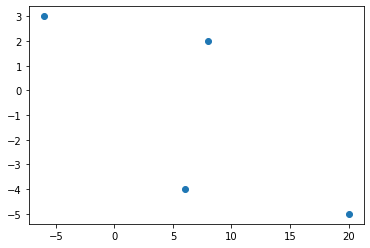

In [139]:
plt.scatter(x = mymat[0,:], y = mymat[1,:])

## Correlations & Covariance & Normalization & Whitening

#### Covariance

In [142]:
np.cov(mymat, bias = True)

array([[ 85. , -24.5],
       [-24.5,  12.5]])

In [143]:
#Now manually!

mean_values = mymat.mean(axis = 1).reshape(-1,1)
mymat - mean_values
np.dot((mymat-mean_values) , (mymat - mean_values).T) /4 ### Notice this is using dividing by n-1

array([[ 85. , -24.5],
       [-24.5,  12.5]])

In [144]:
mymat

array([[20,  8, -6,  6],
       [-5,  2,  3, -4]])

#### Correlation

In [145]:
np.corrcoef(mymat)

array([[ 1.        , -0.75162569],
       [-0.75162569,  1.        ]])

In [146]:
24.5/(np.std(mymat[0,:]) * np.std(mymat[1,:]))

0.751625689070423

#### Normalization

In [147]:
from sklearn import preprocessing

In [153]:
scaler = preprocessing.StandardScaler().fit(mymat.T) ###notice SK Learn does things in obs x features (not features x obs)
X_scaled = scaler.transform(mymat.T)
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(mymat.T)

In [154]:
X_scaled.T

array([[ 1.41004798,  0.10846523, -1.41004798, -0.10846523],
       [-1.13137085,  0.84852814,  1.13137085, -0.84852814]])

In [156]:
scaler.scale_

array([9.21954446, 3.53553391])

#### Whitening

In [169]:
np.linalg.cholesky(np.cov(mymat, bias = True))

In [170]:
np.dot(x, x.T)

array([[ 1.        , -0.75162569],
       [-0.75162569,  1.        ]])

In [163]:
x

array([[ 9.21954446,  0.        ],
       [-2.65739811,  2.33200242]])

In [164]:
mymat

array([[20,  8, -6,  6],
       [-5,  2,  3, -4]])

In [168]:
np.dot(x, mymat - mean_values)

array([[ 119.85407794,    9.21954446, -119.85407794,   -9.21954446],
       [ -43.87418509,    4.33860916,   43.87418509,   -4.33860916]])

In [167]:
mean_values

array([[ 7.],
       [-1.]])

#### PCA

In [173]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(mymat.T)

PCA(n_components=2)

In [175]:
print(pca.explained_variance_ratio_)

[0.94874725 0.05125275]


In [178]:
M = pca.components_
M

array([[ 0.95616874, -0.29281622],
       [ 0.29281622,  0.95616874]])

In [183]:
X_pca = pca.fit_transform(mymat.T)
X_pca

array([[ 13.60145851,  -0.01806411],
       [  0.07772008,   3.16132244],
       [-13.60145851,   0.01806411],
       [ -0.07772008,  -3.16132244]])

In [191]:
np.dot(M,(mymat - mean_values)) # Can we do manually. Yes! And you should. Like doing pushups. It's good for you.

array([[ 13.60145851,   0.07772008, -13.60145851,  -0.07772008],
       [ -0.01806411,   3.16132244,   0.01806411,  -3.16132244]])

In [194]:
### What about the correlations?
np.cov(X_pca.T) 

array([[1.23337143e+02, 1.37052166e-18],
       [1.37052166e-18, 6.66285727e+00]])

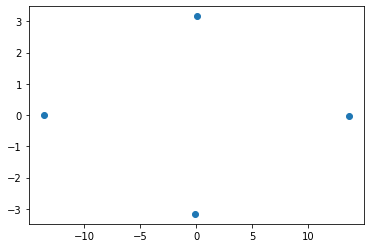

In [195]:
plt.scatter(x = X_pca[:,0], y = X_pca[:,1]) # does the above picture make sense?